In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/ALL_DATA_1.csv",encoding='cp949')

In [3]:
df = df.drop_duplicates(['리뷰'], keep='first')

len(df['제품명'].unique())

52

In [4]:
stopwords_kr = ['가','요','변','을','수','에','문','욧','해주시','겨'
        '제','를','이','도','은','다','게','요','한','일','할','인데','거','좀',
        '는데','뭐','까','있는','잘','습니다','이에요','다면','했','주려','지',
        '있','못','후','중','줄','있다','있습니다','있는','하는','것이다','밝혔다',
        '위해','대해','했다','재배포','21일','따르면','무단전재','관계자는','기자',
        '것으로','말했다','합니다','약간','있어요','좀','가','이','도','들','에','고','~','요','로','쁘',
        '입니닼','잘','욤','욧','ㅡ','젛','플','석조','에요','예요','데',
        '의','에여','지게','굳다','성','이예','대','이에여','이다','내','애','서',
        '전','걸','에게','되어다','작','때문','와','알다','근데','없이','에는',
        '기','이라','엔','이랑','개','같이','먹다','이나','건','하지만','듯','지다',
         '물','이라는','임','여기','면','나다','랑','이라고']

from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 
def displayWordCloud(data = None, backgroundcolor = 'black', width=800, height=600 ): 
    wordcloud = WordCloud( font_path = "c:\\windows\\fonts\\malgun.ttf",
                          stopwords= stopwords_kr, background_color = backgroundcolor, width = width, height = height).generate(data) 
    print(wordcloud.words_) 
    plt.figure(figsize = (15, 10)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.show()

In [5]:
len(stopwords_kr)

71

{'좋아해요': 1.0, '좋아요': 1.0, '가성비대비': 0.5, '짱이네요': 0.5, 'n아이들이': 0.5, '정말': 0.5, 'n저는': 0.5, '영어수업때': 0.5, '교구로': 0.5, '쓸려고': 0.5, '샀는': 0.5, '돌아기가': 0.5, '무지': 0.5, '실실': 0.5, '웃으면서': 0.5, '쓰담쓰담': 0.5, '뽀뽀도': 0.5, '해주더라구요': 0.5, '근데': 0.5, '솜이': 0.5, '어제는': 0.5, '말하고나서': 0.5, '3초이상': 0.5, '쉬었다가': 0.5, '말을': 0.5, '해야지만': 0.5, '따라했습니다': 0.5, '오늘은': 0.5, '더': 0.5, '말': 0.5, '귀엽네요': 0.5, '아기가': 0.5, '어려서': 0.5, '아주': 0.5, '조금': 0.5, '무서워하지만': 0.5, '관심은': 0.5, '계속': 0.5, '보이고': 0.5, 'n지금': 0.5, '재밋어요': 0.5, 'n좀': 0.5, '소리가': 0.5, '큰데': 0.5, '스피커를': 0.5, '작게': 0.5, '하는방법은': 0.5, '없을까요': 0.5, 'n아들이재밋어해요': 0.5, '찾아주시는': 0.5, 'a': 0.5, 's': 0.5, '감사합니다': 0.5, '아이가': 0.5, '매우': 0.5, '좋아하네요': 0.5, '왠지': 0.5, '남은': 0.5, '시리즈도': 0.5, '살각이네요': 0.5, '잘받았어요수고하세요': 0.5, '배송': 0.5, '빨라서': 0.5, '좋았어요': 0.5, 'Name': 0.5, '리뷰': 0.5, 'Length': 0.5, 'dtype': 0.5, 'object': 0.5}


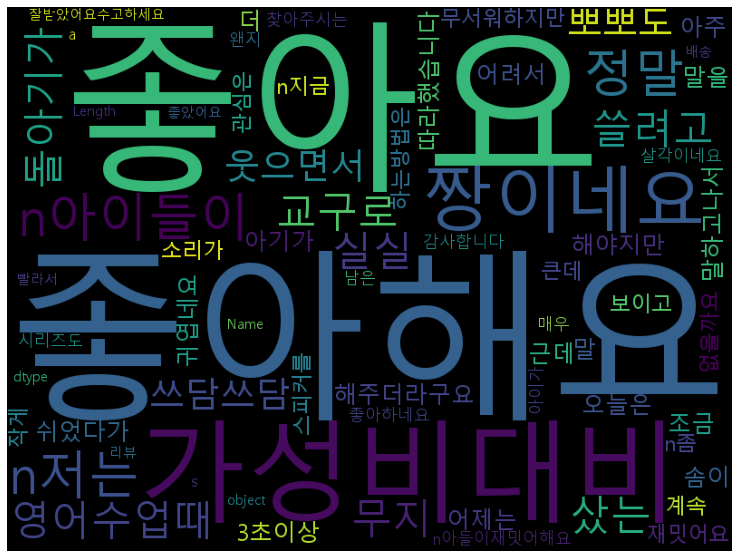

In [6]:
displayWordCloud(str(df['리뷰']))

used default noun predictor; Sejong corpus based logistic predictor
C:/Users/pc/anaconda3/envs/so/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (122946, 72474, 52439)
predicting noun score was done                                        
before postprocessing 17132
_noun_scores_ 2996
checking hardrules ... done / 2996떡볶+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 1600
extracted 37 compounds from eojeolss ... 2000 / 2704{'좋아요': 1.0, '아이': 0.5, '잘따라하네요': 0.25, '강추합니다': 0.25, '무서워하네요': 0.25, '작동합니다': 0.25, '금액대비': 0.25, '훌륭합니다': 0.25, '선물할려고': 0.25, '잘따라합니다': 0.25, '넘좋아하네요': 0.25, '재구매입니다': 0.25, '추천합니다': 0.25, '중간중간': 0.25, '애기가좋아합니다': 0.25, '아이가좋아합니다': 0.25, '신기하긴': 0.25, '타사제품': 0.25, '고장안나고': 0.25, '재미있는데': 0.25, '진짜진짜': 0.25, '동작합니다': 0.25, '총알배송입니다': 0.25, '큼직하네요': 0.25, '재구매합니다': 0.25, '상품인지': 0.25, '엄청커서': 0.25, '조립하긴': 0.25, '비추입니다': 0.25, '엄청엄청': 

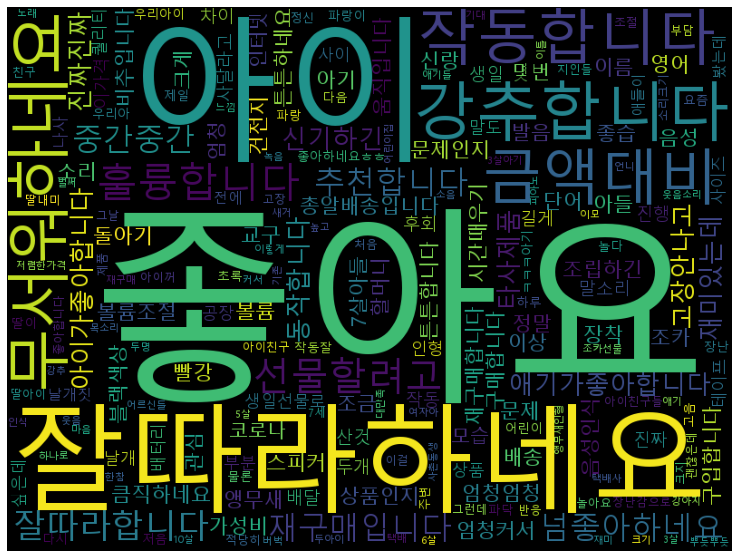

In [7]:
from soynlp.noun import NewsNounExtractor 
noun_extractor = NewsNounExtractor() 
nouns = noun_extractor.train_extract(df['리뷰']) 
displayWordCloud(' '.join(nouns))

In [8]:
import nltk
from nltk import tokenize

lines_list = tokenize.sent_tokenize(str(df['리뷰']))

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

for sent in lines_list:

    ss = sid.polarity_scores(sent)

print(ss['compound'])

0.0


In [10]:
#### 10분 이상 걸림


from konlpy.tag import Twitter

twit = Twitter()

df['token_review'] = df['리뷰'].apply(twit.morphs)
df['tagging'] = df['리뷰'].apply(twit.pos)
df['Noun'] = df['리뷰'].apply(twit.nouns)

C:\Users\pc\anaconda3\envs\so\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
tagging = [j for i in df['tagging'] for j in i ]
tokens = [ take2 for take1 in df['token_review'] for take2 in take1]
text = nltk.Text(tokens, name = 'NMSC')
text.concordance('선물')

Displaying 25 of 2742 matches:
 그냥 갖고 노네요 
 볼륨 조절 하는게 있음 좋았을거 같네요 조카 선물 로 구입 했어요 . 넘 귀엽네요 !! 아직 건전지 장착 은 안 해봐
요 말 진짜 잘 따라 해 요 후회 없어요 추천 합니다 아이 가 생일 선물 로 사 달라 고 해서 샀는데 ... 
 따라는 하는데 발음 이 정확
가 어찌어찌 한거겠죠 앞 으로도 쭉 잘 작동 되면 좋겠어요 어린이날 선물 로 샀어요 ㅎㅎ 
 따라하는게 조금 빠르지만 가성 비 장난감 으로 
ㅋ 딸아이 가 무서워 해서 훈육 에 좋다하니 주변 에서 사 달래 서 선물 했어요 아이 가 너무 좋아해서 친구 에게 선물 해줬어요 ~~~~ 부
변 에서 사 달래 서 선물 했어요 아이 가 너무 좋아해서 친구 에게 선물 해줬어요 ~~~~ 부담 도 되지 않아 아이 친구 들 에게 선물 하기
에게 선물 해줬어요 ~~~~ 부담 도 되지 않아 아이 친구 들 에게 선물 하기 너무 좋아요 ㅎㅎㅎ 아이 가 너무 좋아해요 ㅎㅎ 처음 보자마자
따라하는게 너무 귀여워요 ㅎㅎㅎ 우리 아이 꺼 랑 지인 들 아이 들 선물 로 줬는데 
 정말 좋아하네요 ㅎㅎ 매일 대화 하네요 잘 만들어졌어
 입니다 배송 도 빠르고 아이 들 이 좋아합니다 7 세 딸내미 한테 선물 하면서 이런 장난감 좋아하기엔 크지 않나 하고 걱정 했는데 정말 너
네요 ㅋ 아이 들 이 너무 좋아하네여 ~ 아이 들 이 좋아해요 조카 선물 로 사주었어요 잫 . 받았어요 ㅡ 감사합니다 3 살 아기 요즘 새 
자 도 먹여주고 앵무새 랑 이야기 하네요 아이 들 이 좋아해요 조카 선물 사주었어요 재미 있는 인형 입니다 아이 들 이 엄청 좋아해요 . 신
  정말 말 을 잘 따라 합니다 재구매 했어요 . 친구 딸 한테 도 선물 로 보내주니 좋아하네요 어린이날 선물 로 5 살 조카 에게 줬는데 
 했어요 . 친구 딸 한테 도 선물 로 보내주니 좋아하네요 어린이날 선물 로 5 살 조카 에게 줬는데 품 에 안고 데리 고 다니면서 너무 좋
 아이 가 좋아해요 신기해하고 재미있어

아이 : 8275
배송 : 4238
선물 : 2742
가격 : 2059
아기 : 1946
조카 : 1899
가지 : 1758
구매 : 1436
생각 : 1234
아들 : 1011
아주 : 936
정말 : 896
가성 : 881
장난감 : 807
애기 : 804


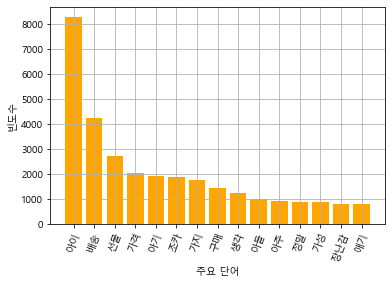

In [12]:
from collections import Counter
import matplotlib
from matplotlib import font_manager, rc

matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

def showGraph(wordInfo):
    
    font_location = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font', family=font_name)

    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center',color='orange')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()


noun_text = [ take2 for take1 in df['Noun'] for take2 in take1]
text = nltk.Text(noun_text, name='NMSC')
count = Counter(text.vocab())
wordInfo = dict()
for tags, counts in text.vocab().most_common(20):
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts
        print ("%s : %d" % (tags, counts))
            
showGraph(wordInfo)